In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.linear_model import LassoCV, Lasso
import numpy as np
from sklearn.datasets import make_regression



from csv_reader import *

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
7445      7446       4   0    11  20        1        5           0   
13512    13513       3   1     7   5        0        0           0   
6158      6159       3   0     9   4        0        1           1   
13205    13206       3   1     7  10        0        1           1   
1616      1617       1   0     3  20        0        6           0   
...        ...     ...  ..   ...  ..      ...      ...         ...   
10955    10956       2   1     4  15        0        5           1   
17289    17290       1   1    12   6        0        5           1   
5192      5193       3   0     8   6        0        2           1   
12172    12173       2   1     5   9        0        0           0   
235        236       1   0     1   2        0        2           1   

       weathersit  temp   atemp   hum  windspeed  
7445            1  0.32  0.3182  0.39     0.1940  
13512           1  0.60  0.5455  0.88     0.0000  
6158  

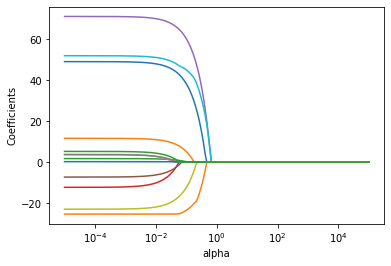

In [13]:
bike_sharing_df = get_bike_sharing_df()
bike_sharing_df.columns

Y = bike_sharing_df.cnt
X = bike_sharing_df.loc[:].drop(columns=["dteday", "casual","registered","cnt"])



X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)
print(X_train)

n_folds = 5
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

parameters = { 'lasso__alpha':alphas}

scaler = StandardScaler()
lasso = Lasso(normalize=True,tol=2,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)

gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

coefs = []
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'lasso__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(lasso__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients');


# plt.figure()
# ax = plt.gca()
# ax.plot(alphas, coefs,'o')
# ax.set_xscale('log')
#
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('Coefficients')
# plt.title('Zoomed in')
# plt.xlim(.01,100)


In [15]:
# coefficients {𝛽1,…,𝛽𝑝} for the last fitted model in the above for loop
pipe.named_steps['lasso'].coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.])

In [16]:
# B0
pipe.named_steps['lasso'].intercept_

188.19144550373616

In [17]:
# Average of Y's
np.mean(y_train)

188.19144550373616

In [19]:
# Best alpha
best_alpha = gs.best_params_['lasso__alpha']
print(best_alpha)

0.09329304026284686


In [23]:
scaler = StandardScaler()
lasso = Lasso(alpha=best_alpha,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
pipe.fit(X_train, y_train)

best_coef_lasso = pipe.named_steps['lasso'].coef_

# print('The final set of coefficients: ')
print(best_coef_lasso)

[  1.0573385   20.50452537  38.041879     0.          52.63790409
  -4.55692791   3.28142924   1.76004883  -1.6536604    4.14256749
  50.56305373 -38.33195506   5.13998074]


In [26]:
print('\nCoefficients  [lasso]')
for i in range(0,13):
    print('   Feature %2i:  %.2f'%(i,\
                    best_coef_lasso[i]))


Coefficients  [lasso]
   Feature  0:  1.06
   Feature  1:  20.50
   Feature  2:  38.04
   Feature  3:  0.00
   Feature  4:  52.64
   Feature  5:  -4.56
   Feature  6:  3.28
   Feature  7:  1.76
   Feature  8:  -1.65
   Feature  9:  4.14
   Feature 10:  50.56
   Feature 11:  -38.33
   Feature 12:  5.14


In [ ]:


print(bike_sharing_df.columns)





lm = sm.OLS(y_train, sm.add_constant(x_train)).fit()

y_train_pred = lm.predict(sm.add_constant(x_train))
y_test_pred = lm.predict(sm.add_constant(x_test))

print('Train Score: ')
print(r2_score(y_train, y_train_pred))

print('\nTest Score: ')
print(r2_score(y_test, y_test_pred))